In [15]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

import torch

In [16]:
labels_dict = {
    "custom_data_v4": [
        f"{lr=}, {epochs=}{' (cancelled)' if epochs == 3 else ''}" for lr, epochs in zip([1.4e-5, 1.4e-5, 5e-6, 1e-5], [4, 6, 3, 12])
    ],
    "imdb": [
        f"{lr=}, {epochs=}" for lr, epochs in zip([1e-5, 1e-5, 1e-5, 1.4e-5, 1e-5], [4, 10, 10, 12, 12])
    ],
    "imdb_supervised": [
        f"{lr=}, {epochs=}" for lr, epochs in zip([1e-5], [12])
    ]
}

# pattern = "custom_data_v4"
# pattern = "imdb"
pattern = "imdb_supervised"
files = sorted(Path("/fsx/home-augustas/ppo_logs/").glob(f"*{pattern}*"))
files = [x / f"rewards_{x.name.split('_')[-1]}.csv" for x in files]
print(f"{len(files)} files found")

if pattern == "custom_data_v4":
    files = files[1:]
    labels_dict[pattern] = labels_dict[pattern][1:]
elif pattern == "imdb":
    files = [x for x in files if not "supervised" in x.parent.name]
    files = files[-2:]
    labels_dict[pattern] = labels_dict[pattern][-2:]

print(f"{len(files)} files after filtering")
print([x.name for x in files])

1 files found
1 files after filtering
['rewards_37165.csv']


Baseline: 0.5146267414093018, STD: 0.3664291799068451, 2*STD: 0.7328583598136902


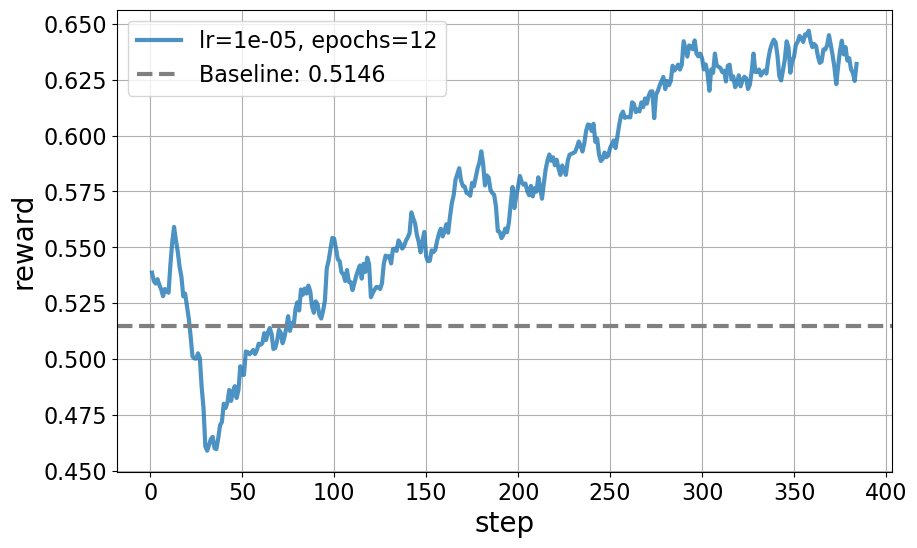

In [19]:
label_fontsize = 20
tick_fontsize = 16
linewidth = 3


def plot_rewards(df, ts_factor=0.8, label=None, alpha=1.0):
    # Calculate EMA values using provided formula
    y_ema_updated = df['Value'].ewm(alpha=(1 - ts_factor)).mean()

    # Plot original data
    # plt.plot(df['Step'], df['Value'], label='Original data')

    # Plot EMA data
    plt.plot(df['Step'], y_ema_updated, label=label, alpha=alpha, linewidth=linewidth)


# Define baseline and std
# rewards = torch.load(f"outputs/ppo_rewards_{pattern}.pt")
rewards = torch.load(f"outputs/ppo_rewards_{pattern}_len_4_2.pt")
baseline = rewards.mean()
std = rewards.std()
print(f"Baseline: {baseline}, STD: {std}, 2*STD: {2 * std}")

# Update EMA coefficient
ts_factor = 0.8

# Create the plot
plt.figure(figsize=(10, 6))

for file, label in zip(files, labels_dict[pattern]):
    # Load the CSV data into a pandas DataFrame
    df = pd.read_csv(file)
    plot_rewards(df, ts_factor=ts_factor, label=label, alpha=0.8)


# Add baseline and std
plt.axhline(y=baseline, color='grey', linestyle='--', label=f'Baseline: {baseline:.4f}', linewidth=linewidth)
# plt.fill_between(df['Step'], (baseline - std), (baseline + std), color='grey', alpha=0.5, label=f'STD: {std}')

# Add title and labels
# plt.title('TensorBoard Log Data')
plt.xlabel('step', fontsize=label_fontsize)
plt.ylabel('reward', fontsize=label_fontsize)

# Set the tick label font size
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Grid
plt.grid()

# Add legend
plt.legend(fontsize=tick_fontsize)

# Display the plot
# plt.show()
plt.savefig(f'outputs/rl_{pattern}.png', dpi=300)